In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from matplotlib.offsetbox import AnchoredText

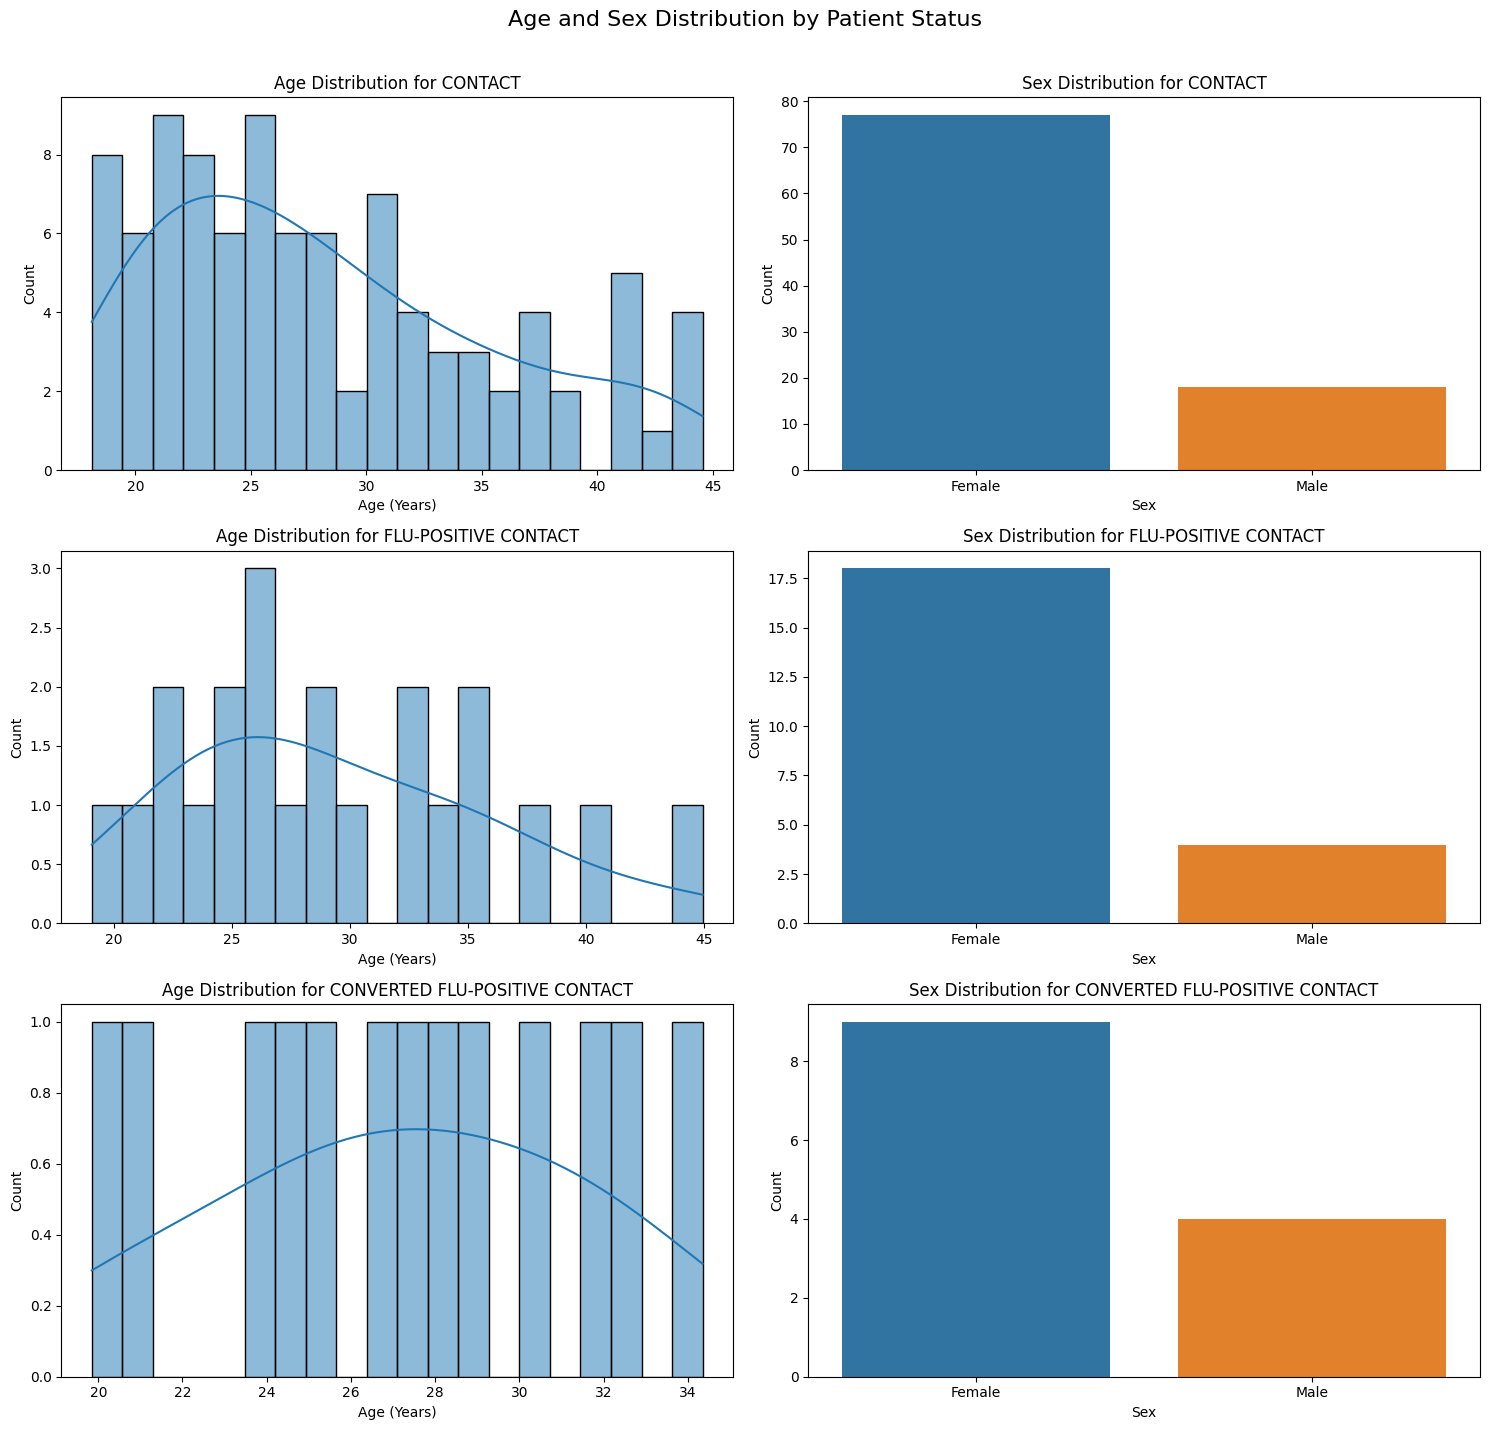

In [13]:
file_path = '4545167/Table_1.xlsx'
patient_info_df = pd.read_excel(file_path)

statuses = patient_info_df['Status'].unique()

# Drop Index status cases
patient_info_df = patient_info_df[patient_info_df['Status'] != 'INDEX']

#  drop Index from the statuses list
statuses = [status for status in statuses if status != 'INDEX']

# Remove any records with age <18 or >45
patient_info_df = patient_info_df[(patient_info_df['Age'] >= 18) & (patient_info_df['Age'] <= 45)]

# Creating subplots for each status to analyze Age distribution
fig, axes = plt.subplots(len(statuses), 2, figsize=(15, 5 * len(statuses)))
fig.suptitle('Age and Sex Distribution by Patient Status', fontsize=16)

for i, status in enumerate(statuses):
    # Filter data for current status
    status_df = patient_info_df[patient_info_df['Status'] == status]

    # Age distribution for the current status
    sns.histplot(status_df['Age'].dropna(), ax=axes[i, 0], kde=True, bins=20)
    axes[i, 0].set_title(f'Age Distribution for {status}')
    axes[i, 0].set_xlabel('Age (Years)')
    axes[i, 0].set_ylabel('Count')

    # Sex distribution for the current status
    sns.countplot(x='Sex', data=status_df, ax=axes[i, 1])
    axes[i, 1].set_title(f'Sex Distribution for {status}')
    axes[i, 1].set_xlabel('Sex')
    axes[i, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('age_sex_distribution.svg')
plt.show()

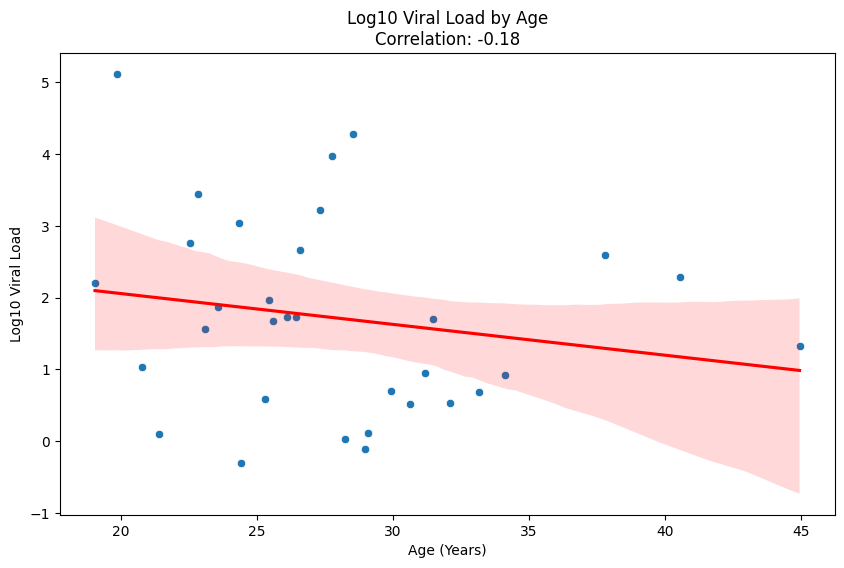

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Filtering out rows where log-Viral-Load or Age is NaN
viral_load_age_df = patient_info_df[['Age', 'log-Viral-Load']].dropna()

# Plotting log10 Viral Load by Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=viral_load_age_df, x='Age', y='log-Viral-Load')

# Adding a trendline
sns.regplot(data=viral_load_age_df, x='Age', y='log-Viral-Load', scatter=False, color='red')

# Displaying the correlation and quality of fit
correlation, p_value = stats.pearsonr(viral_load_age_df['Age'], viral_load_age_df['log-Viral-Load'])
plt.title(f'Log10 Viral Load by Age\nCorrelation: {correlation:.2f}')

plt.xlabel('Age (Years)')
plt.ylabel('Log10 Viral Load')
plt.grid(False)
plt.savefig('log10_viral_load_by_age.svg')
plt.show()

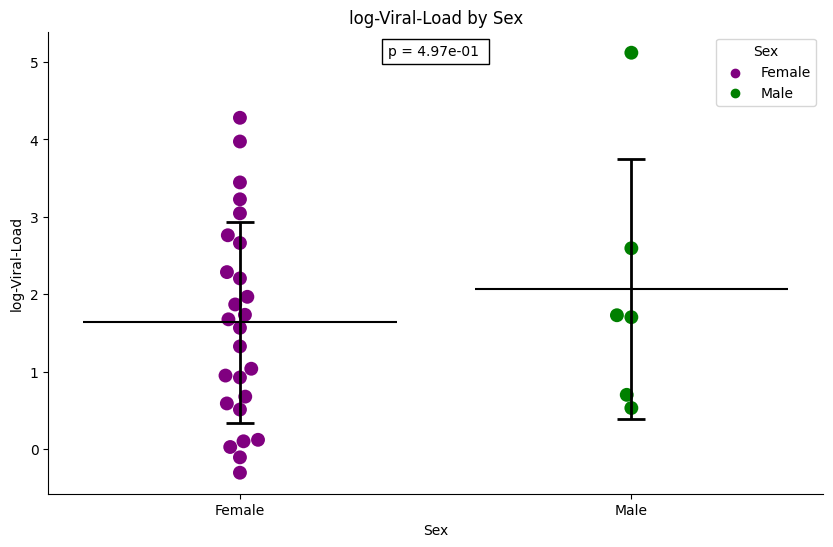

In [10]:
def plot_data_by_category(df, column, category):

    # Filter data for the specific column
    data = df[[category, column]].dropna()

    # Replace 0 with NaN for log transformation
    data[column].replace(0, np.nan, inplace=True)
    data = data.dropna(subset=[column])

    # Creating the plot
    plt.figure(figsize=(10, 6))
    sns.swarmplot(x=category, y=column, data=data, size=10, edgecolor='black', 
                  palette={'Male': 'green', 'Female': 'purple'}, hue=category, zorder=1)

    # Calculate mean and standard deviation for each category
    means = data.groupby(category)[column].mean()
    stds = data.groupby(category)[column].std()

    for cat in data[category].unique():
        mean = means[cat]
        std = stds[cat]
        i = list(data[category].unique()).index(cat)
        plt.errorbar(i, mean, yerr=std, fmt='none', color='black', capsize=10, elinewidth=2, capthick=2, zorder=2)
        plt.hlines(mean, xmin=i-0.4, xmax=i+0.4, colors='black', linestyles='solid', zorder=2)

    # T-test and p-value (if both categories are present)
    if len(data[category].unique()) > 1:
        cat1_data = data[data[category] == data[category].unique()[0]][column]
        cat2_data = data[data[category] == data[category].unique()[1]][column]
        t_stat, p_value = ttest_ind(cat1_data, cat2_data)
        significance = "*" if p_value < 0.05 else ""
        anchored_text = AnchoredText(f'p = {p_value:.2e} {significance}', loc='upper center')
        plt.gca().add_artist(anchored_text)

    # Setting labels and title
    plt.ylabel(column)
    plt.title(f'{column} by {category}')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(False)
    plt.savefig(f'{column}_by_{category}.svg')
    plt.show()

# Applying the function to the patient info dataframe
plot_data_by_category(patient_info_df, 'log-Viral-Load', 'Sex')

Saved plot: EGF_by_Sex_CONVERTED FLU-POSITIVE CONTACT.svg


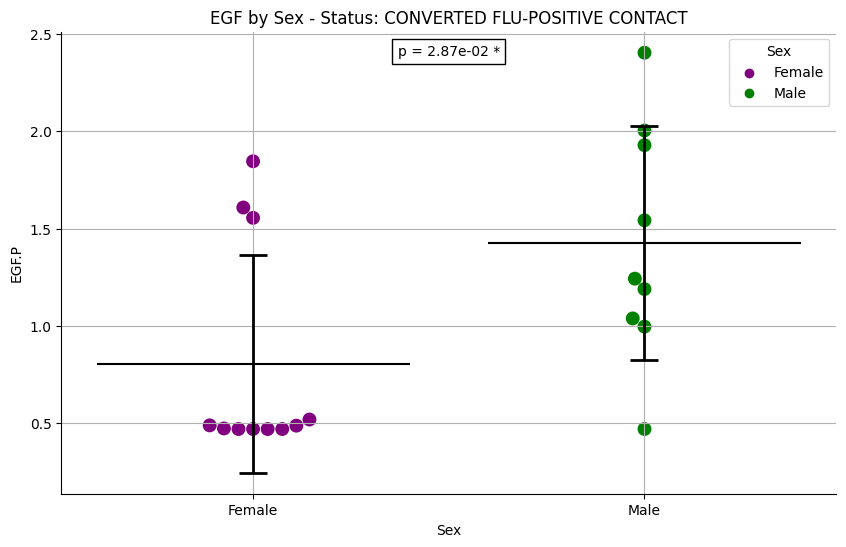

Saved plot: Eotaxin_by_Sex_FLU-POSITIVE CONTACT.svg


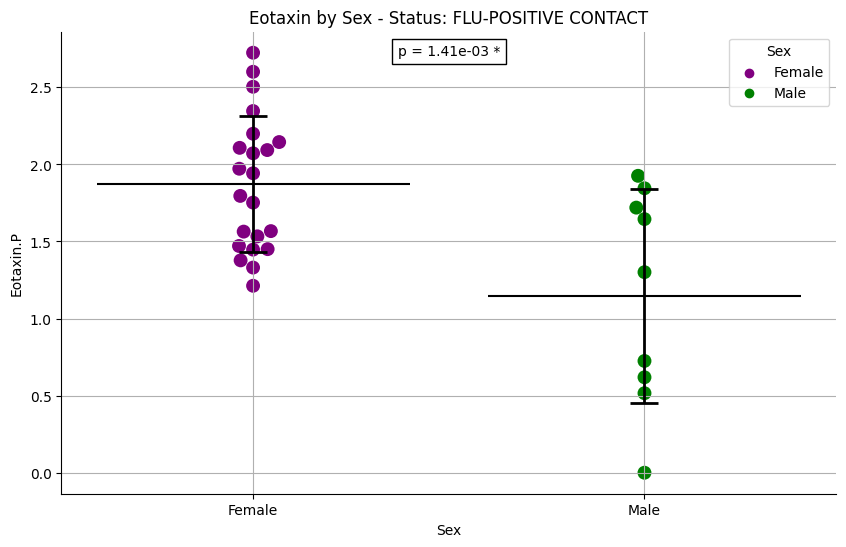

Saved plot: Eotaxin_by_Sex_CONVERTED FLU-POSITIVE CONTACT.svg


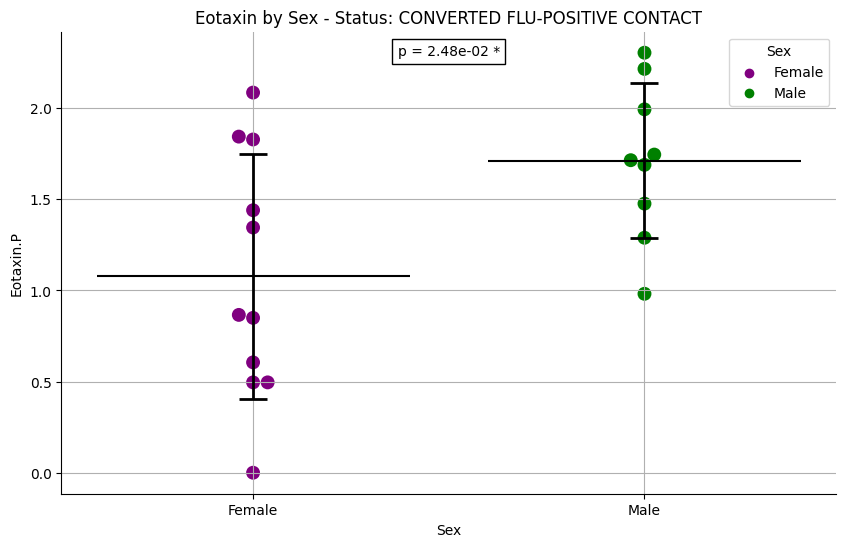

Saved plot: GCSF_by_Sex_FLU-POSITIVE CONTACT.svg


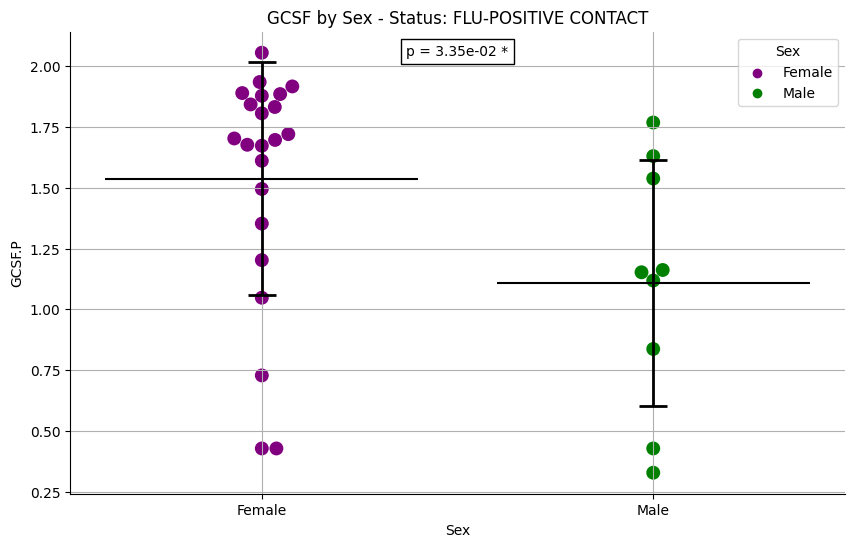

Saved plot: IFNα2_by_Sex_FLU-POSITIVE CONTACT.svg


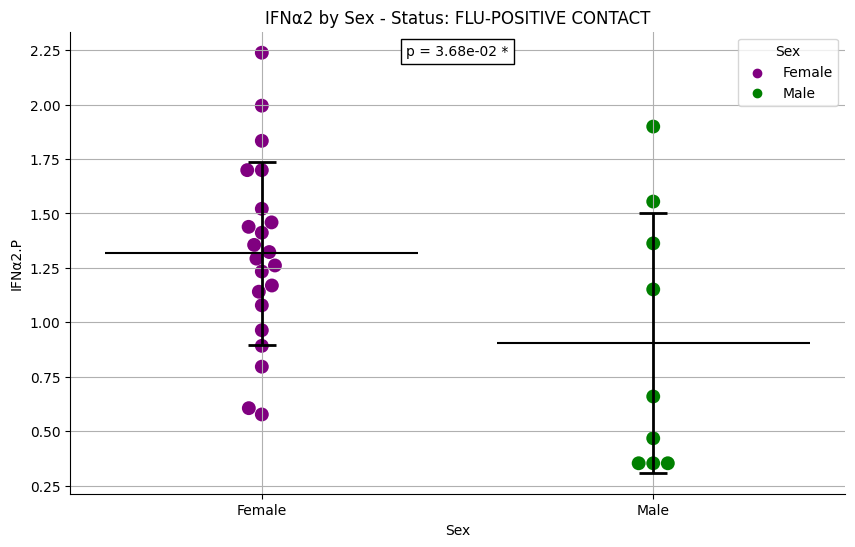

Saved plot: IL8_by_Sex_FLU-POSITIVE CONTACT.svg


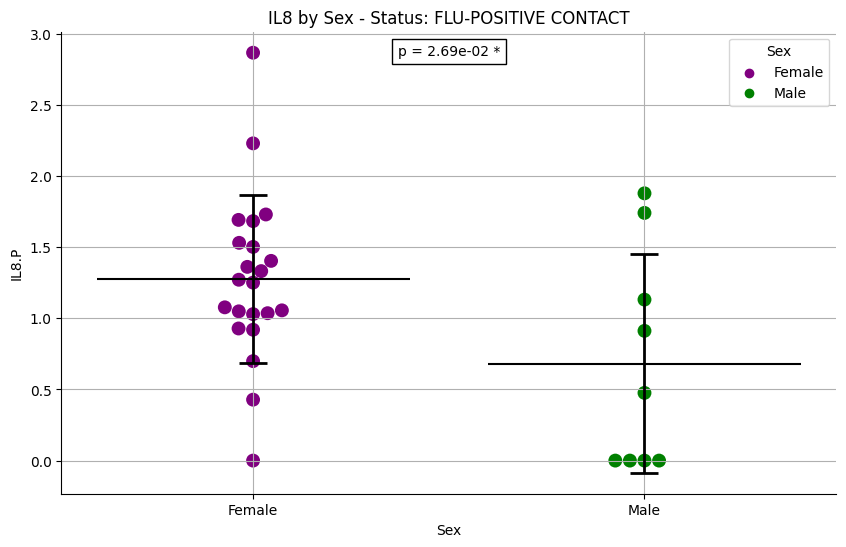

No data available for IL10, All, IL10.P. Skipping plot.
Saved plot: MCP1_by_Sex_FLU-POSITIVE CONTACT.svg


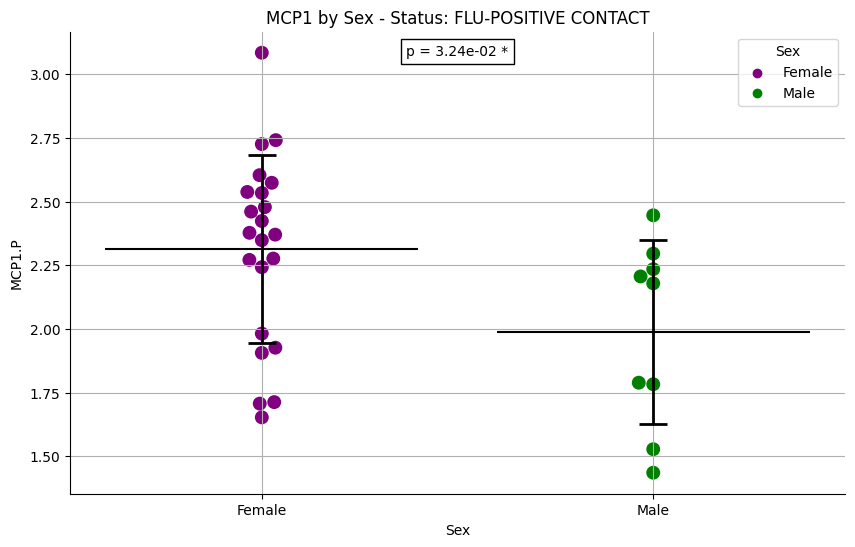

Saved plot: sCD40-L_by_Sex_FLU-POSITIVE CONTACT.svg


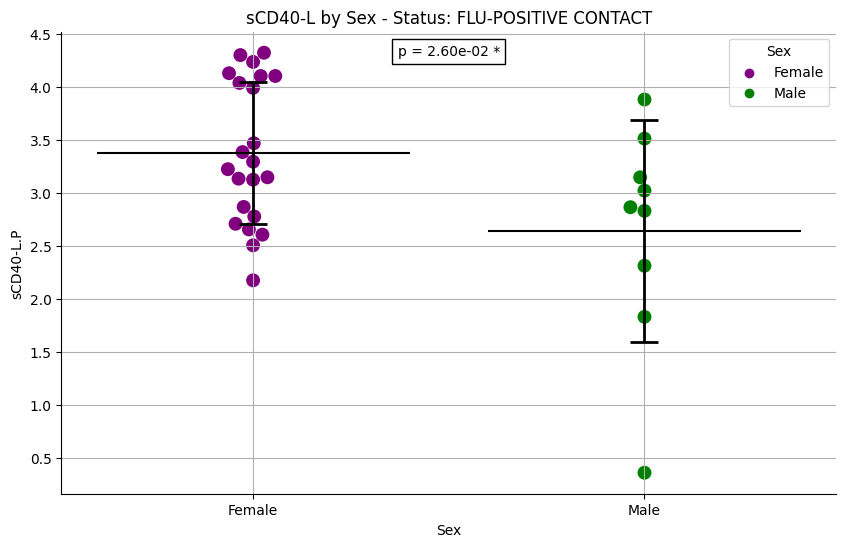

Saved plot: sCD40-L_by_Sex_CONVERTED FLU-POSITIVE CONTACT.svg


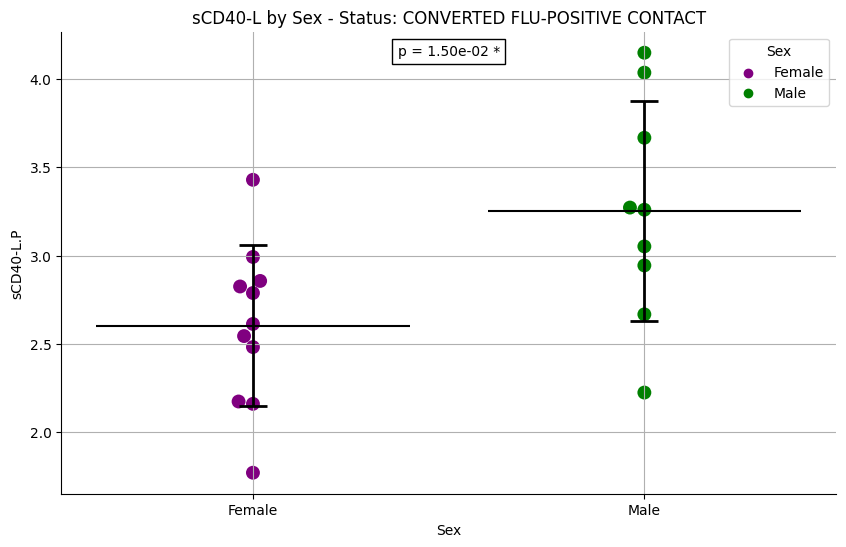

Saved plot: VEGF_by_Sex_FLU-POSITIVE CONTACT.svg


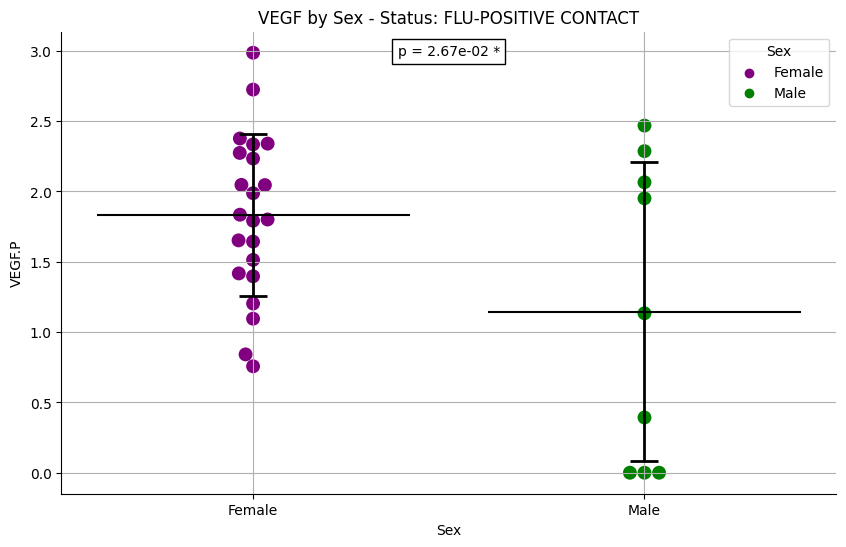

Saved plot: EGF_by_Sex_INDEX.svg


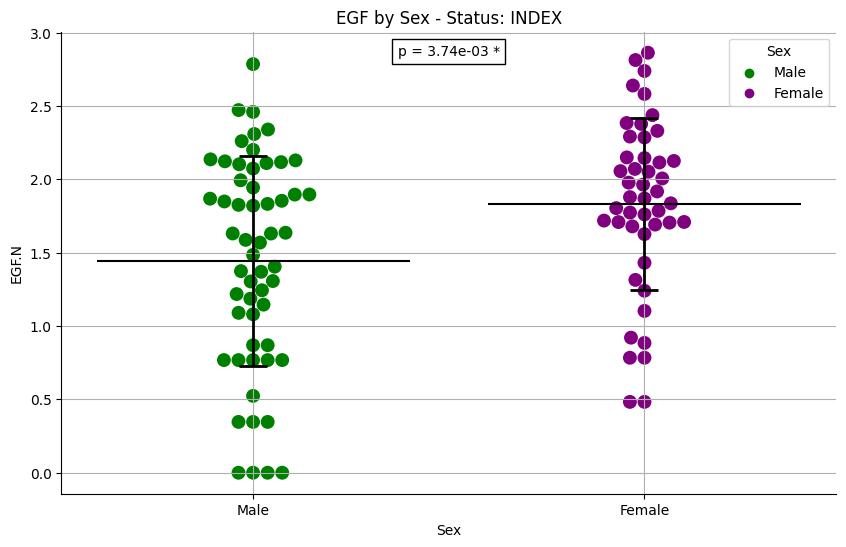

Saved plot: Eotaxin_by_Sex_INDEX.svg


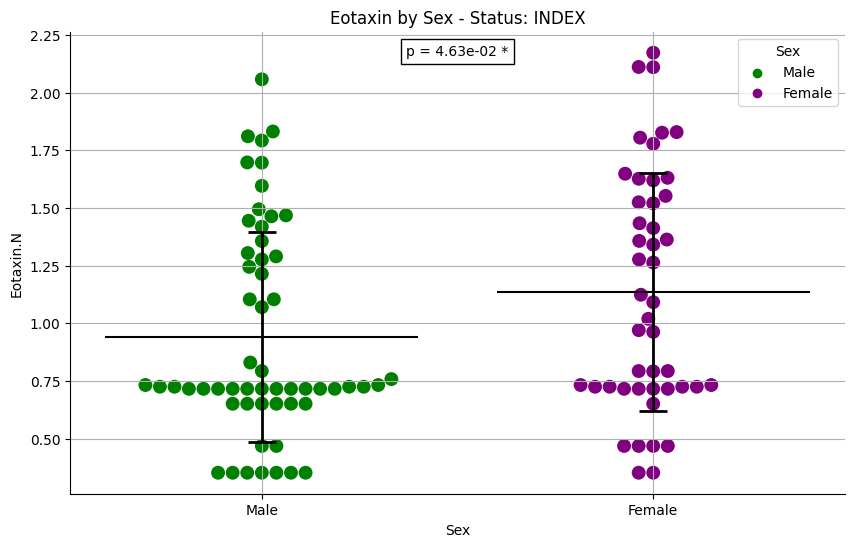

Saved plot: FGF-2_by_Sex_FLU-POSITIVE CONTACT.svg


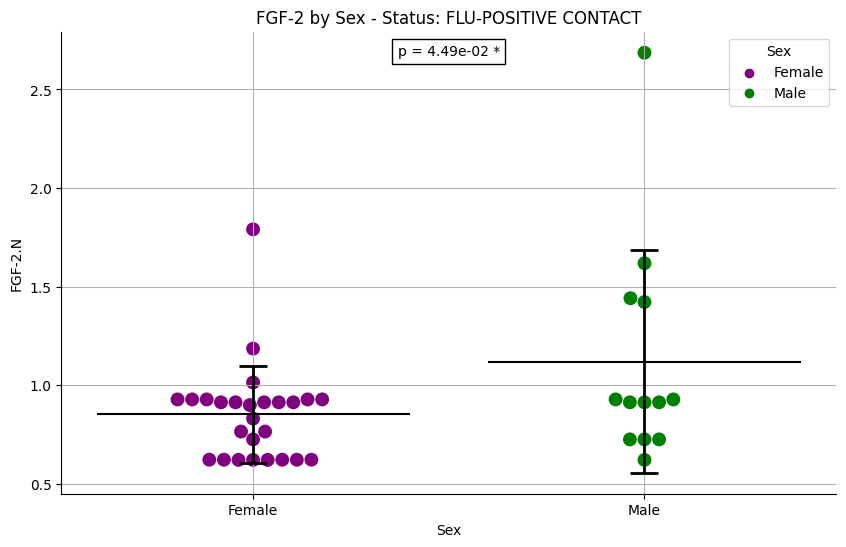

No data available for FGF-2, All, FGF-2.N. Skipping plot.
Saved plot: FLT3L_by_Sex_FLU-POSITIVE CONTACT.svg


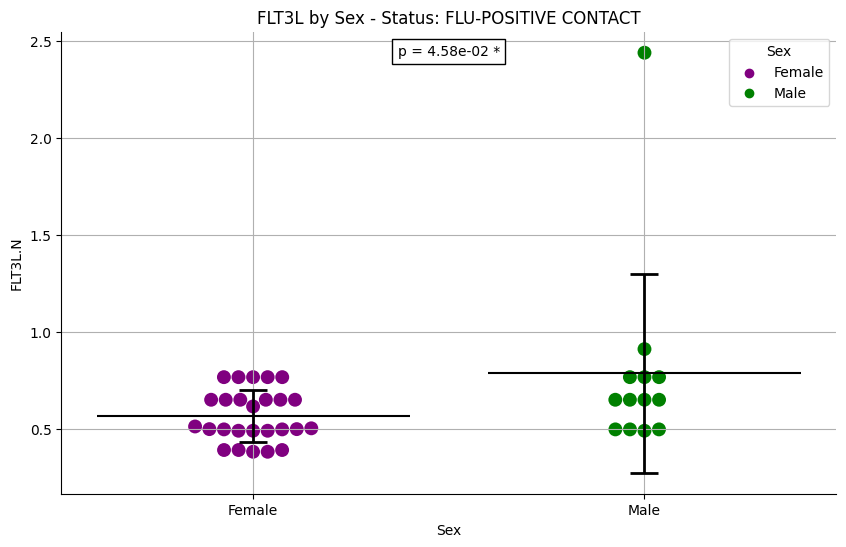

Saved plot: FKN_by_Sex_INDEX.svg


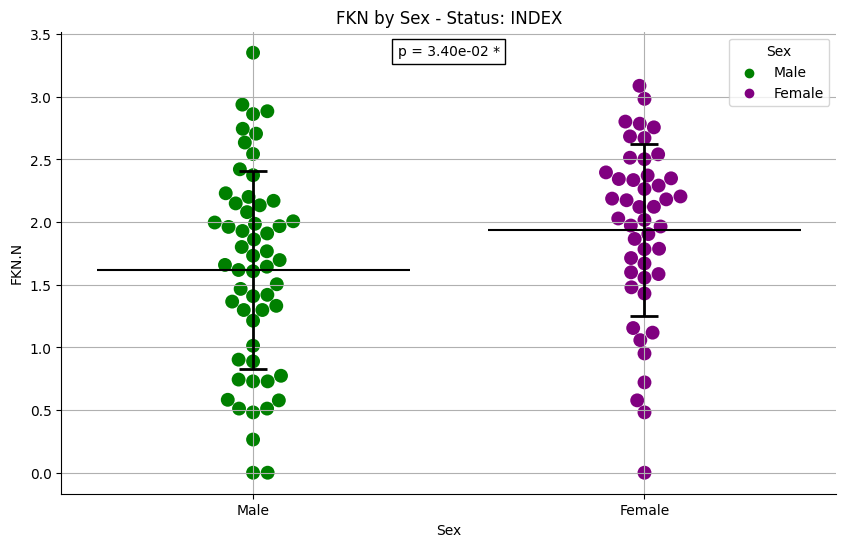

Saved plot: GCSF_by_Sex_FLU-POSITIVE CONTACT.svg


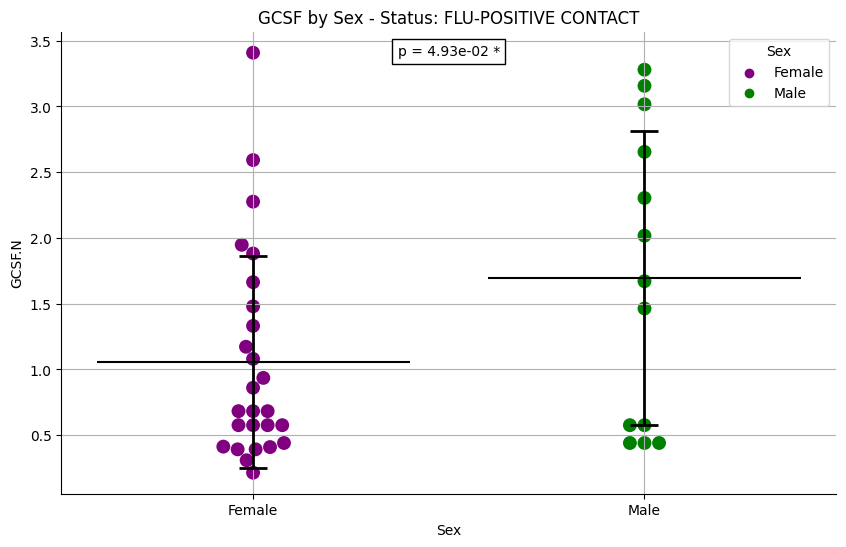

No data available for GCSF, All, GCSF.N. Skipping plot.
No data available for GM-CSF, All, GM-CSF.N. Skipping plot.
No data available for IFNγ, All, IFNγ.N. Skipping plot.
Saved plot: IL1α_by_Sex_INDEX.svg


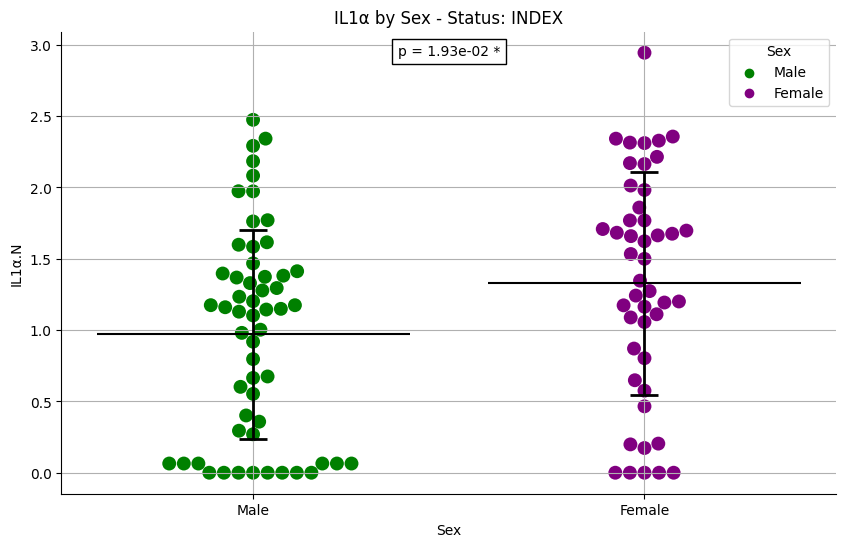

No data available for IL1β, All, IL1β.N. Skipping plot.
No data available for IL5, All, IL5.N. Skipping plot.
Saved plot: IL6_by_Sex_FLU-POSITIVE CONTACT.svg


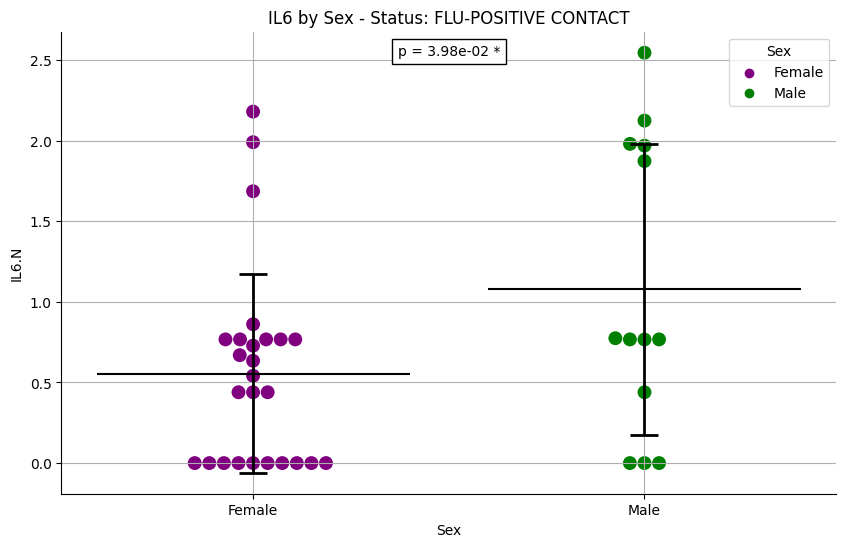

No data available for IL6, All, IL6.N. Skipping plot.
Saved plot: IL7_by_Sex_FLU-POSITIVE CONTACT.svg


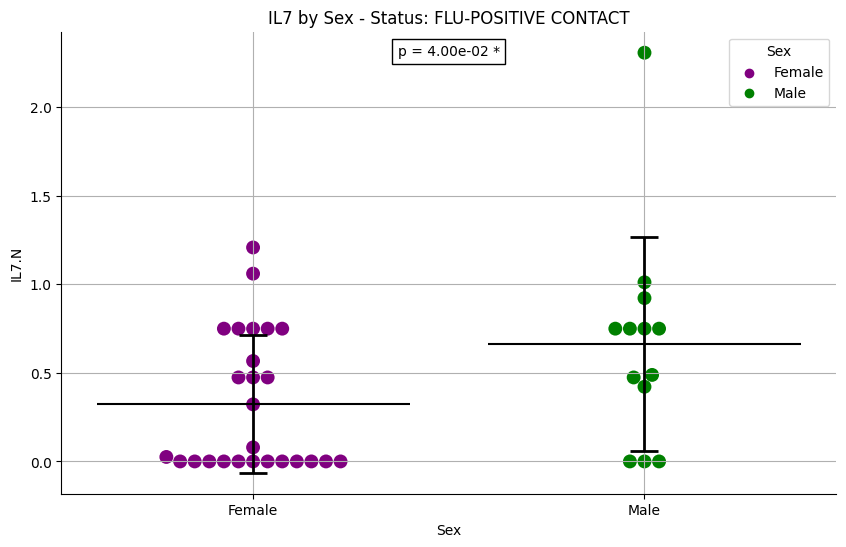

Saved plot: IL9_by_Sex_INDEX.svg


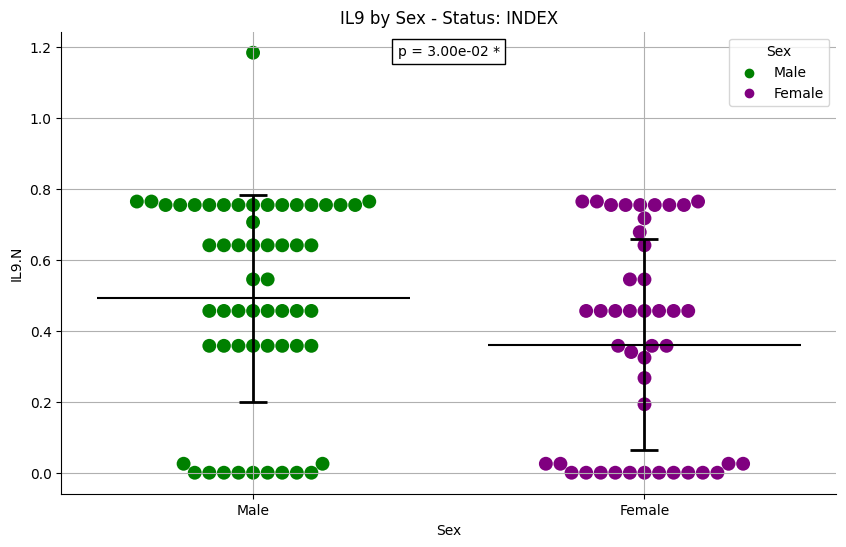

No data available for IL10, All, IL10.N. Skipping plot.
Saved plot: IL12-P40_by_Sex_INDEX.svg


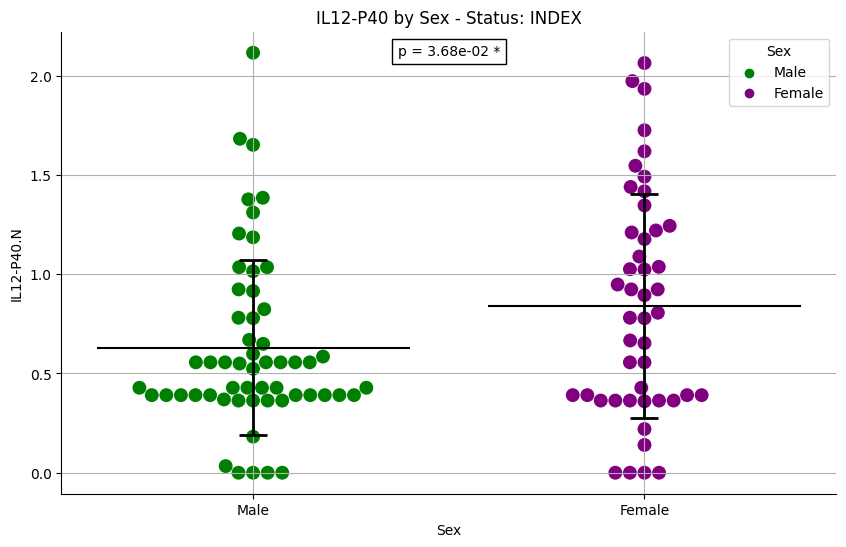

Saved plot: MCP1_by_Sex_INDEX.svg


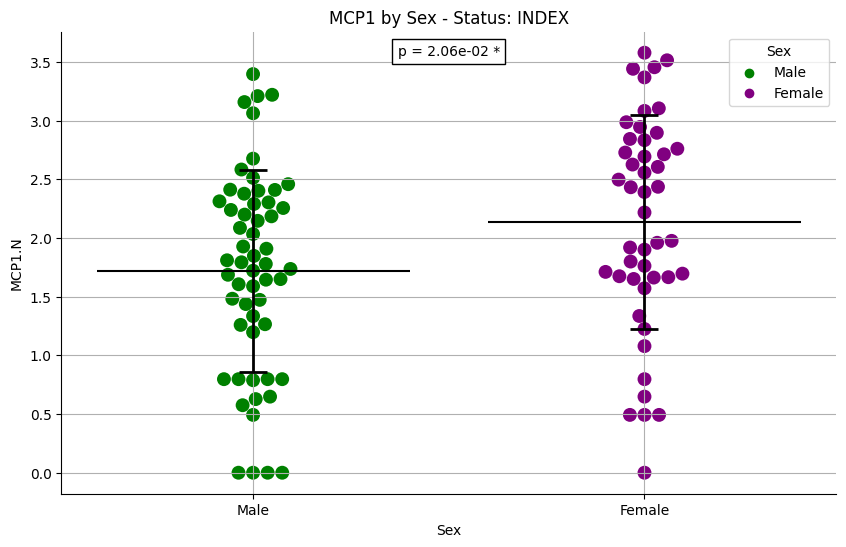

Saved plot: MCP3_by_Sex_FLU-POSITIVE CONTACT.svg


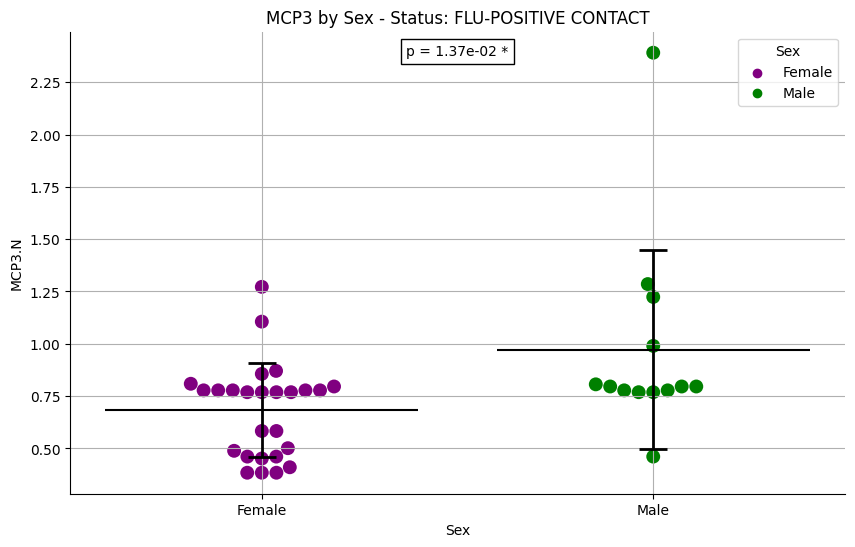

No data available for MDC, All, MDC.N. Skipping plot.
Saved plot: MIP1α_by_Sex_FLU-POSITIVE CONTACT.svg


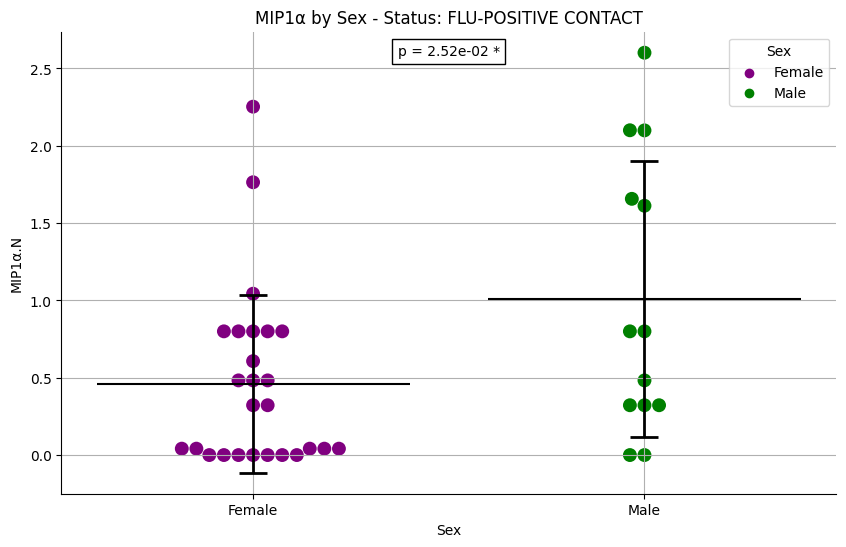

No data available for MIP1α, All, MIP1α.N. Skipping plot.
Saved plot: MIP1β_by_Sex_FLU-POSITIVE CONTACT.svg


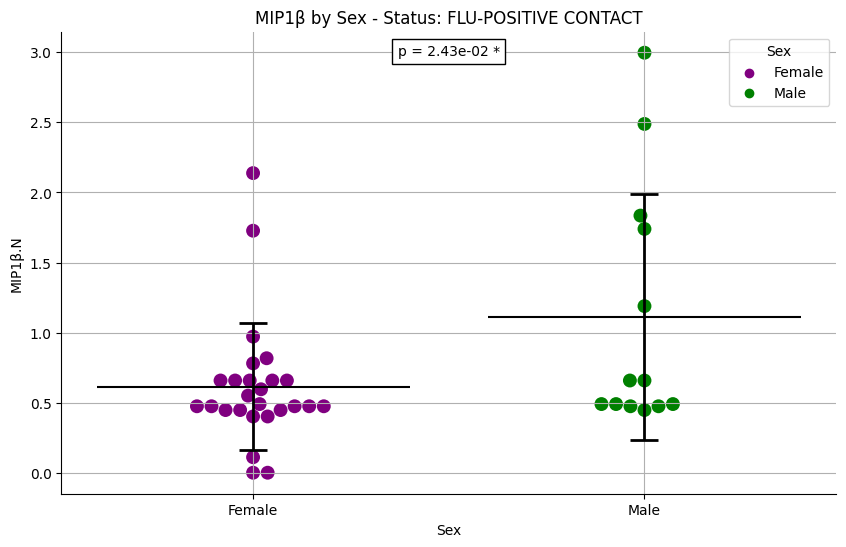

No data available for MIP1β, All, MIP1β.N. Skipping plot.
No data available for sCD40-L, All, sCD40-L.N. Skipping plot.
Saved plot: TGFα_by_Sex_INDEX.svg


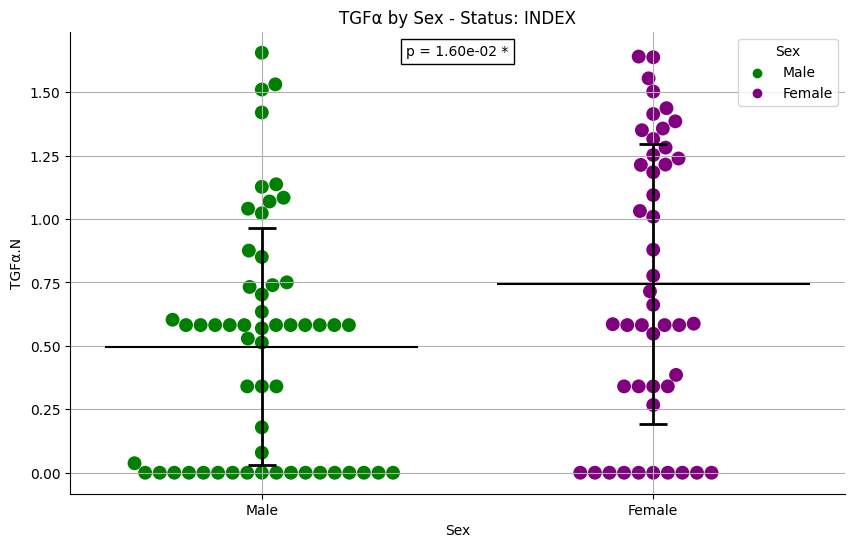

No data available for TNFα, All, TNFα.N. Skipping plot.
Saved plot: VEGF_by_Sex_FLU-POSITIVE CONTACT.svg


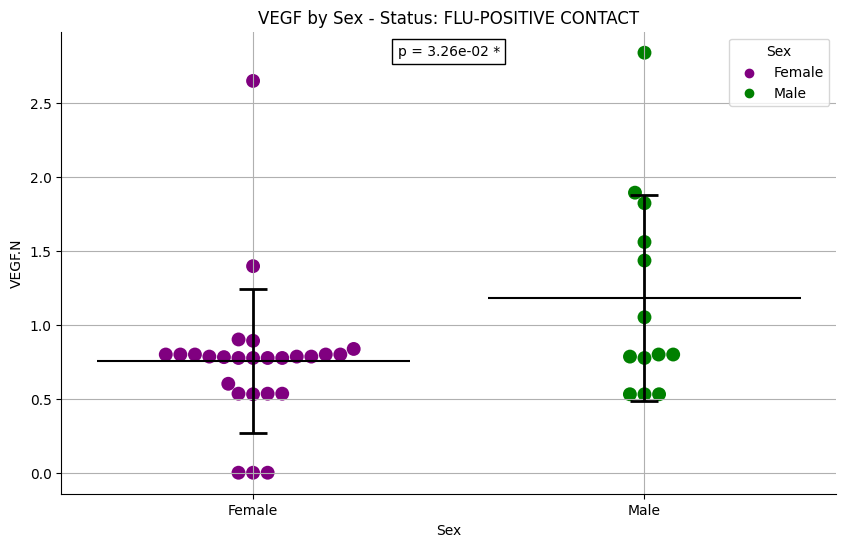

No data available for VEGF, All, VEGF.N. Skipping plot.


In [36]:
def plot_data_by_category(df, pair):
    cytokine = pair['Cytokine']
    status = pair['Status']
    sex_comparison = pair['Sex Comparison']

    # Filter data for the specific column and status
    data = df[df['Status'] == status][['Sex', sex_comparison]].dropna()

    if data.empty:
        print(f"No data available for {cytokine}, {status}, {sex_comparison}. Skipping plot.")
        return

    # Creating the plot
    plt.figure(figsize=(10, 6))
    sns.swarmplot(x='Sex', y=sex_comparison, data=data, size=10, edgecolor='black', 
                  palette={'Male': 'green', 'Female': 'purple'}, hue='Sex', zorder=1)

    # Calculate mean and standard deviation for each category
    unique_sexes = data['Sex'].unique()
    means = data.groupby('Sex')[sex_comparison].mean()
    stds = data.groupby('Sex')[sex_comparison].std()

    for i, sex in enumerate(unique_sexes):
        mean = means[sex]
        std = stds[sex]
        plt.errorbar(i, mean, yerr=std, fmt='none', color='black', capsize=10, elinewidth=2, capthick=2, zorder=2)
        plt.hlines(mean, xmin=i-0.4, xmax=i+0.4, colors='black', linestyles='solid', zorder=2)

    # T-test and p-value (if both categories are present)
    if len(unique_sexes) > 1:
        cat1_data = data[data['Sex'] == unique_sexes[0]][sex_comparison]
        cat2_data = data[data['Sex'] == unique_sexes[1]][sex_comparison]
        t_stat, p_value = ttest_ind(cat1_data, cat2_data)
        significance = "*" if p_value < 0.05 else ""
        anchored_text = AnchoredText(f'p = {p_value:.2e} {significance}', loc='upper center')
        plt.gca().add_artist(anchored_text)

    # Setting labels and title
    plt.ylabel(sex_comparison)
    plt.title(f'{cytokine} by Sex - Status: {status}')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(True)
    
    # Save plot as SVG
    svg_filename = f"{cytokine}_by_Sex_{status}.svg"
    plt.savefig(svg_filename)
    print(f"Saved plot: {svg_filename}")
    
    plt.show()
